In [53]:
from tensorflow.keras.datasets import fashion_mnist

In [54]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [55]:
x_train.shape

(60000, 28, 28)

In [56]:
imshape=(28,28,1)

In [57]:
x_train = x_train.reshape(x_train.shape[0],*imshape)
x_test = x_test.reshape(x_test.shape[0],*imshape)

In [58]:
x_train.shape

(60000, 28, 28, 1)

In [59]:
x_test.shape

(10000, 28, 28, 1)

In [60]:
import matplotlib.pyplot as plt

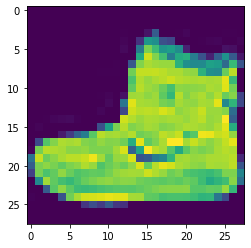

In [61]:
plt.imshow(x_train[0])

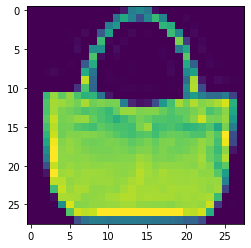

In [62]:
plt.imshow(x_train[100])

In [63]:
y_train[0]

9

In [64]:
from tensorflow.keras.utils import to_categorical

In [65]:
y_train = to_categorical(y_train,10)

In [66]:
y_test = to_categorical(y_test,10)

In [67]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [68]:
import numpy as np

In [69]:
np.max(x_train)

255

In [70]:
np.min(x_train)

0

In [71]:
x_train = x_train/255

In [72]:
x_test = x_test/255

In [73]:
np.max(x_train)

1.0

In [74]:
np.min(x_train)

0.0

In [75]:
from tensorflow.keras.models import Sequential

In [76]:
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Dropout

In [77]:
model = Sequential()

In [78]:
model.add(Conv2D(256,kernel_size=(3,3),input_shape=imshape,activation='relu'))

In [79]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [80]:
model.add(Conv2D(64,kernel_size=(3,3),input_shape=imshape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [81]:
model.add(Flatten())

In [82]:
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [83]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        147520    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [85]:
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 344s 184ms/step - loss: 0.4473 - accuracy: 0.8387
Epoch 2/10
1875/1875 [==============================] - 340s 182ms/step - loss: 0.3018 - accuracy: 0.8894
Epoch 3/10
1875/1875 [==============================] - 336s 179ms/step - loss: 0.2582 - accuracy: 0.9048
Epoch 4/10
1875/1875 [==============================] - 335s 178ms/step - loss: 0.2290 - accuracy: 0.9150
Epoch 5/10
1875/1875 [==============================] - 409s 218ms/step - loss: 0.2038 - accuracy: 0.9240
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1827 - accuracy: 0.93 - 361s 193ms/step - loss: 0.1827 - accuracy: 0.9314
Epoch 7/10
1875/1875 [==============================] - 339s 181ms/step - loss: 0.1636 - accuracy: 0.9372
Epoch 8/10
1875/1875 [==============================] - 337s 180ms/step - loss: 0.1485 - accuracy: 0.9444
Epoch 9/10
1875/1875 [==============================] - 339s 181ms/step - loss: 0.1328 - accuracy: 0.9503
Epoc

In [86]:
  model.evaluate(x_test,y_test)

313/313 [==============================] - 15s 48ms/step - loss: 0.3124 - accuracy: 0.9057


[0.31244662404060364, 0.9057000279426575]

In [87]:
from sklearn.metrics import classification_report

In [88]:
prediction=model.predict_classes(x_test)

In [89]:
model.metrics_names

['loss', 'accuracy']

In [90]:
y_test = np.argmax(y_test,axis=1)

In [91]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.84      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.86      0.83      0.85      1000
           5       0.99      0.96      0.97      1000
           6       0.69      0.81      0.75      1000
           7       0.91      0.99      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

